In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## Aufgabe 1, c.)

: Wir lösen die lineare Gleichung $Ax = b$,
wobei $x = [β, α]^T$
, $b = [y_1, y_2, ..., y_n]^T$
, und $A = [x_1, 1; x_2, 1; ...; x_n, 1]$.
$x$ ist dann $x = (A^T A)
^{−1}A^T
b$.


In [29]:
x = [-2,-1,3,4,6]
y = [0,0.5,2,2,5]

In [13]:
A = np.array((x,[1 for i in range(len(x))])).T

In [15]:
b = np.array(y).T

In [34]:
alpha, beta = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))
alpha, beta

(0.5326086956521738, 0.8347826086956522)

In [39]:
y_hat = [alpha + beta*i for i in x]
y_hat

[-1.1369565217391306,
 -0.3021739130434784,
 3.0369565217391306,
 3.871739130434783,
 5.541304347826087]

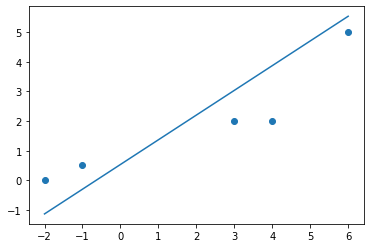

In [47]:
n = np.linspace(-2, 6, 1000)

plt.scatter(x=x,y=y)
plt.plot(n, alpha+beta*n)

## Aufgabe 2
Als Data Scientist haben Sie den Auftrag, in einer Firma herauszufinden, welche Mitarbeiter öfters
abwesend sind, wovon dies abhängt und wie man Absenzen voraussagen kann. Dazu erhalten Sie
den Datensatz employees.csv (Qulle: fiktiver Datensatz von kaggle.com), den Sie vorzugsweise
mittels Python analysieren.
### a.)
Daten sind oft nicht bereinigt. Die Firma sagt Ihnen, dass der Praktikant beim Erheben des
Datensatzes bestimmt ein paar Tippfehler gemacht hat. Ihnen wird auch gesagt, dass jeder
Mitarbeiter **mindestens einmal gefehlt hat**. Bereinigen Sie den Datensatz.

In [66]:
df = pd.read_csv('data/employees.csv')
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [64]:
# not necessary for exercise
df.drop(columns=['EmployeeNumber','Surname','GivenName'], inplace=True)

In [69]:
# drop rows with missing values (if NA's values in DataFrame)
print(len(df))
df.dropna(how='any')
print(len(df))

8336
8336


In [73]:
['Age','AbsentHours']

In [79]:
df.Age = df.Age.astype(int)
df.AbsentHours = df.AbsentHours.astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   int32  
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   int32  
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(9)
memory usage: 781.6+ KB


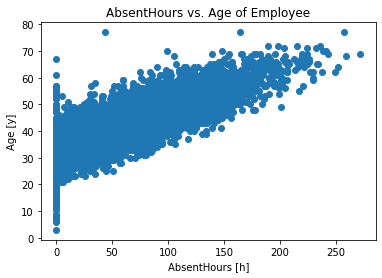

In [95]:
plt.scatter(df.AbsentHours, df.Age)
plt.title("AbsentHours vs. Age of Employee")
plt.xlabel("AbsentHours [h]")
plt.ylabel("Age [y]");

In [96]:
row = np.where(df.AbsentHours == 0)

In [100]:
print(len(df))
df.drop(index = df.index[row], inplace=True)
print(len(df))

6983


IndexError: index 6983 is out of bounds for axis 0 with size 6983

### b.)
Wovon hängen die Absenzen eher ab, von der Anzahl Jahren im Betrieb oder dem Alter der
Mitarbeiter? Führen Sie jeweils eine Regression durch.

In [159]:
# regression Age ~ AbsentHours
x = df.Age.values.reshape(-1,1)
y = df.AbsentHours.values.reshape(-1,1)
reg = LinearRegression().fit(x,y)

In [160]:
r_2 = reg.score(x,y)
r_2

0.6468056351521929

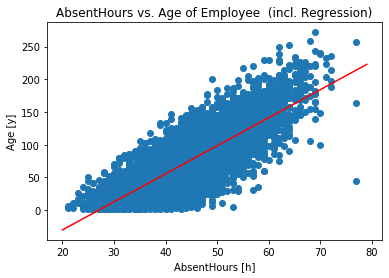

In [161]:
x_new = np.arange(60).reshape(-1,1)+20
y_new = reg.predict(x_new)
plt.scatter(df.Age,df.AbsentHours)
plt.plot(x_new, y_new, color='red')
plt.title("AbsentHours vs. Age of Employee  (incl. Regression)")
plt.xlabel("AbsentHours [h]")
plt.ylabel("Age [y]");

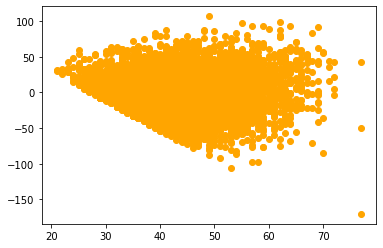

In [169]:
# residuen
residuen1 = y - reg.predict(x)
plt.scatter(x,residuen1, color='orange')

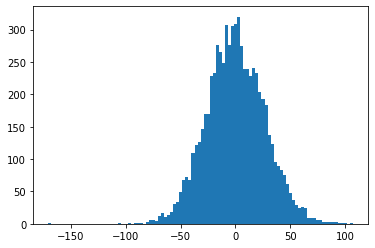

In [172]:
plt.hist(residuen1, bins=100);


In [148]:
# regression LengthService ~ AbsentHours
x = df.LengthService.values.reshape(-1,1)
reg2 = LinearRegression().fit(x,y)

In [150]:
r_2 = reg2.score(x,y)
r_2

0.0005405893813970053

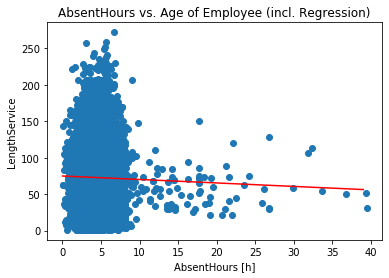

In [156]:
plt.scatter(df.LengthService, df.AbsentHours)
x_new = np.arange(40).reshape(-1,1)
y_new = reg2.predict(x_new)
plt.plot(x_new, y_new, color='red')
plt.title("AbsentHours vs. Age of Employee (incl. Regression)")
plt.xlabel("AbsentHours [h]")
plt.ylabel("LengthService");